In [1]:
from pathlib import Path

import imagededup

In [7]:
image_dir = Path('/Users/lucas/Downloads/emergency_lane_seg_yolo_v3')

# Hashing

#### Find duplicates using Perceptual hashing along with scores
使用感知哈希和分数查找重复项

In [8]:
from imagededup.methods import PHash

phasher = PHash()
duplicates = phasher.find_duplicates(image_dir=image_dir, scores=True)

2025-07-31 16:23:20,958: INFO Start: Calculating hashes...
  0%|          | 0/2051 [00:00<?, ?it/s]2025-07-31 16:23:24,061: WARNING Invalid image file /Users/lucas/Downloads/emergency_lane_seg_yolo_v3/47905eb814014641bf5b3955301d31a5.json:
cannot identify image file '/Users/lucas/Downloads/emergency_lane_seg_yolo_v3/47905eb814014641bf5b3955301d31a5.json'
2025-07-31 16:23:24,061: WARNING Invalid image file /Users/lucas/Downloads/emergency_lane_seg_yolo_v3/9e9fe4f0753d4735969475241ee93f10.json:
cannot identify image file '/Users/lucas/Downloads/emergency_lane_seg_yolo_v3/9e9fe4f0753d4735969475241ee93f10.json'
2025-07-31 16:23:24,062: WARNING Invalid image file /Users/lucas/Downloads/emergency_lane_seg_yolo_v3/463847d482244a7b9235b7a27b9c2a58.json:
cannot identify image file '/Users/lucas/Downloads/emergency_lane_seg_yolo_v3/463847d482244a7b9235b7a27b9c2a58.json'
2025-07-31 16:23:24,064: WARNING Invalid image file /Users/lucas/Downloads/emergency_lane_seg_yolo_v3/d2f83b4e609c4cb9895586bfd

In [13]:
for k, v in duplicates.items():
    if len(v) > 0:
        print(k, v)

fc36c4bc04d14b2eb28758f95f6172f0.jpg [('3.jpg', 0)]
3.jpg [('fc36c4bc04d14b2eb28758f95f6172f0.jpg', 0)]


In [14]:
''' 该项目同样也可用于以图搜图，给定图片，在指定文件夹中找到与这张图片类似的图片 '''
# 将待查找的图片放入指定文件夹中
for k, v in duplicates.items():
    if k == '3.jpg':
        print(k, v)

3.jpg [('fc36c4bc04d14b2eb28758f95f6172f0.jpg', 0)]


### Plotting duplicates for image file: 'ukbench00120.jpg'

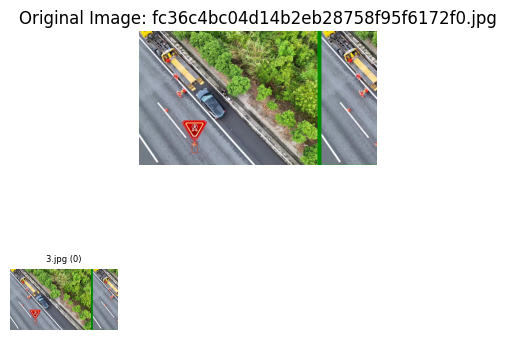

In [12]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates, filename='fc36c4bc04d14b2eb28758f95f6172f0.jpg')

#### Find duplicates to remove using Perceptual hashing

In [8]:
from imagededup.methods import PHash

phasher = PHash()
duplicates_list = phasher.find_duplicates_to_remove(image_dir)

2025-07-29 15:55:33,966: INFO Start: Calculating hashes...
100%|██████████| 1158/1158 [00:06<00:00, 181.55it/s]
2025-07-29 15:55:41,169: INFO End: Calculating hashes!
2025-07-29 15:55:41,170: INFO Start: Evaluating hamming distances for getting duplicates
2025-07-29 15:55:41,170: INFO Start: Retrieving duplicates using Cython Brute force algorithm
100%|██████████| 1158/1158 [00:02<00:00, 393.38it/s]
2025-07-29 15:55:44,870: INFO End: Retrieving duplicates using Cython Brute force algorithm
2025-07-29 15:55:44,870: INFO End: Evaluating hamming distances for getting duplicates


In [23]:
# 删除重复文件
for file_name in duplicates_list:
    file_path = image_dir / file_name  # 构建完整文件路径
    try:
        file_path.unlink()  # 删除文件
        print(f"已删除文件: {file_name}")
    except FileNotFoundError:
        print(f"文件不存在: {file_name}")
    except Exception as e:
        print(f"删除文件 {file_name} 时出错: {e}")

已删除文件: 85097515f51a4c5f917e368d0c47931a.jpg
已删除文件: 027810c4601540839426b17026dae6d9.jpg
已删除文件: 43d9d3bc937d4bcb9f57109817e0e345.jpg
已删除文件: 4333229c3db74396bbfa0ca5b1781029.jpg
已删除文件: 112879cc2b9d4abf9cdaaba5f2bea414.jpg
已删除文件: 5e83c59f23cc4e93be29cf232adeaee5.jpg
已删除文件: 9e1d5915708f42ce94230d818b66bce5.jpg
已删除文件: 09144e3a157c4ae7b192a22b037f0ae3.jpg
已删除文件: d88278ed89ab492faa48feb079c052c2.jpg
已删除文件: 620d5e68f63947fe8e3bbbc553114888.jpg
已删除文件: 1d00b38b899e45b7ba97e12ab3cf4485.jpg
已删除文件: 0a6d1b7071dc41a3adecba15a053a456.jpg
已删除文件: 9ac1e97624ba4db4bc8d7f221af2ba28.jpg
已删除文件: d076f0b7884b44a79c5aeb0179cb41a3.jpg
已删除文件: 0123895439924c60b9fe081af37da1b5.jpg
已删除文件: 3c317cc381d54e9fb478df997c2e7a7c.jpg
已删除文件: fe862972239f41b6941fe85884d43e8c.jpg
已删除文件: 0dce516d28934d8e837626bd7087c7cf.jpg
已删除文件: 549aa4765a1e48dcb7866eedfa0626bf.jpg
已删除文件: 3ed131bb6ec948bd9af7c50355fa541d.jpg
已删除文件: 9148e0adf6dd4fb58a1691550e96f204.jpg
已删除文件: 42adaefc81e04b8c9fc28a2b0ecb3716.jpg
已删除文件: 4b38d33bdca745c484ee154fc

# CNN

#### Find duplicates using CNN along with scores

In [14]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_cnn = cnn_encoder.find_duplicates(image_dir=image_dir, scores=True)

2025-07-29 15:57:57,777: INFO Device set to cpu ..
2025-07-29 15:57:57,780: INFO Initialized: mobilenet_v3_small for feature extraction ..
2025-07-29 15:57:57,781: INFO Start: Image encoding generation
2025-07-29 15:58:23,223: INFO End: Image encoding generation
2025-07-29 15:58:23,229: INFO Start: Calculating cosine similarities...
2025-07-29 15:58:23,231: INFO End: Calculating cosine similarities.


In [15]:
duplicates_cnn

{np.str_('0026249244c1477596ef6ef6d6e2fb7e.jpg'): [(np.str_('396cf6f966464932b279a124575e2562.jpg'),
   np.float32(0.9327244)),
  (np.str_('53be35d816da4ed7a4deef4766e09324.jpg'), np.float32(0.91706365)),
  (np.str_('76bd24eab9cd478e9aeaf611a82900c2.jpg'), np.float32(0.903112)),
  (np.str_('e49bf95b7fb2461ba9624dcfcb0b60f0.jpg'), np.float32(0.90001))],
 np.str_('002fa99386944053b5ebc8c5d7bbd242.jpg'): [(np.str_('36cecf687a1f4f07b10fbd9760ab2a8e.jpg'),
   np.float32(0.9001584)),
  (np.str_('7e7d1d8efe9844ab81ac88b7a4f49beb.jpg'), np.float32(0.9114472)),
  (np.str_('df1433e7b80b425bb9780c689c6bceac.jpg'), np.float32(0.9534796))],
 np.str_('008c8bf8eda44be0a1007cd1ddacfe20.jpg'): [(np.str_('6483f2623c03423d8cf5e5a9184e93f3.jpg'),
   np.float32(0.913247))],
 np.str_('0123895439924c60b9fe081af37da1b5.jpg'): [(np.str_('a9a24f7633c840edace0a2323bc8d38c.jpg'),
   np.float32(0.99592936))],
 np.str_('016c497451e246549c43ede7372ad278.jpg'): [(np.str_('2231402e37064aa8b3dab19dde67658a.jpg'),
   np

### Plotting duplicates for image file: 'ukbench00120.jpg'

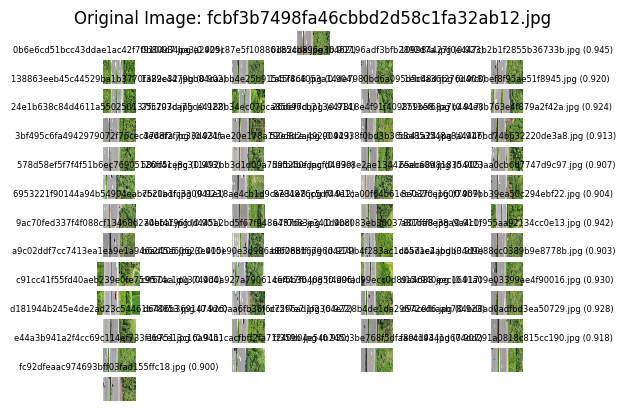

In [16]:
from imagededup.utils import plot_duplicates
plot_duplicates(image_dir=image_dir, duplicate_map=duplicates_cnn, filename='fcbf3b7498fa46cbbd2d58c1fa32ab12.jpg')

#### Find duplicates to remove using CNN

In [17]:
from imagededup.methods import CNN

cnn_encoder = CNN()
duplicates_list_cnn = cnn_encoder.find_duplicates_to_remove(image_dir=image_dir)

2025-07-29 15:59:04,725: INFO Device set to cpu ..
2025-07-29 15:59:04,728: INFO Initialized: mobilenet_v3_small for feature extraction ..
2025-07-29 15:59:04,729: INFO Start: Image encoding generation
2025-07-29 15:59:29,268: INFO End: Image encoding generation
2025-07-29 15:59:29,274: INFO Start: Calculating cosine similarities...
2025-07-29 15:59:29,276: INFO End: Calculating cosine similarities.


In [20]:
len(duplicates_list_cnn)

822